## Importing Libraries

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

## Importing the Data

In [57]:
cancer_data = pd.read_csv("breast_cancer.csv")

X = cancer_data.iloc[:,1:-1].values
y = cancer_data.iloc[:,-1].values

## Checking for Missing Data

In [ ]:
cancer_data.isna().sum()

## Splitting the Dataset

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

## Building the Model

In [60]:
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Testing the Model


In [ ]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Creating the Confusion Matrix

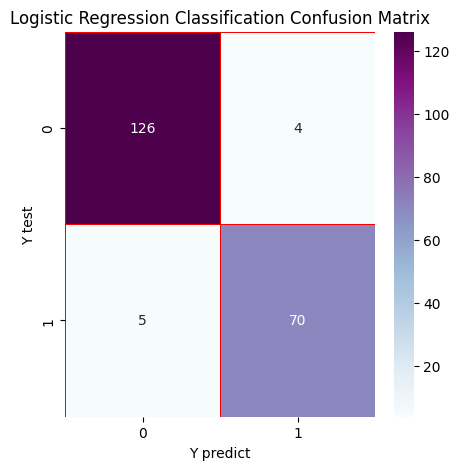

0.9560975609756097

In [65]:
mat = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(mat, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

accuracy_score(y_test, y_pred)

## Accuracy with K-Fold Cross Validation

In [66]:
accuracy = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f}%".format(accuracy.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracy.std()*100))

Accuracy: 96.86%
Standard Deviation: 1.94%
